In [7]:
import numpy as np
from time_series import sample_timeseries, whiten_transforms, whiten_transforms_from_cdf
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Generate a Gaussian distribution
data=np.random.normal(1,1.,size=200)

(array([  3.,   1.,  10.,  32.,  37.,  42.,  41.,  24.,   7.,   3.]),
 array([-1.87359578, -1.3396113 , -0.80562681, -0.27164232,  0.26234217,
         0.79632666,  1.33031114,  1.86429563,  2.39828012,  2.93226461,
         3.4662491 ]),
 <a list of 10 Patch objects>)

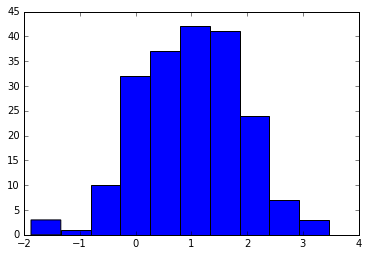

In [9]:
plt.hist(data)

(0.99367543996685725, 0.91977991276380044)


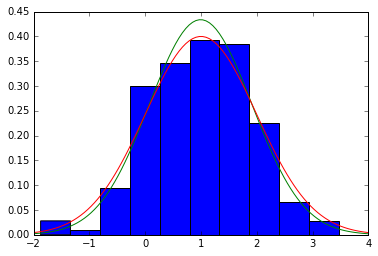

In [16]:
#- fit data to a Gaussian function
from scipy.stats import norm
mu,sig=norm.fit(data)
print(mu,sig)
#- plot
plt.hist(data, bins=10, normed=True)
xmin,xmax=plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mu, sig)
plt.plot(x, y)

def norm_model(x):
    p = np.array([1.,1.]) #- Gaussian parm for mean=1, std=1.
    y = norm.pdf(x,p[0],p[1])
    return y / (y.sum() * np.gradient(x))
model=norm_model(x)
plt.plot(x,model)
plt.show()

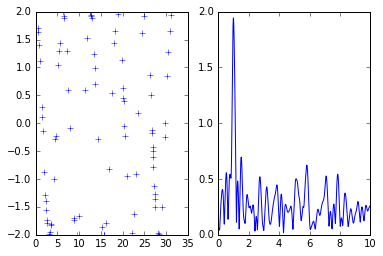

In [38]:
import scipy.signal
def test_period():
    A = 2.
    w = 1.
    phi = 0.5 * np.pi
    nin = 1000
    nout = 100000
    frac_points = 0.9 # Fraction of points to select
    
    r = np.random.rand(nin)
    x = np.linspace(0.01, 10*np.pi, nin)
    x = x[r >= frac_points]
    normval = x.shape[0] # For normalization of the periodogram
    y = A * np.sin(w*x+phi)
    plt.subplot(121)
    plt.plot(x,y,'b+')
    f = np.linspace(0.01, 10, nout)
    pgram = scipy.signal.lombscargle(x, y, f)
    plt.subplot(122)
    plt.plot(f, np.sqrt(4*(pgram/normval)))
    plt.show()
test_period()

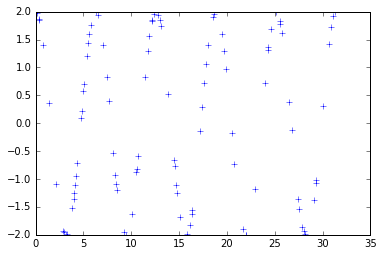

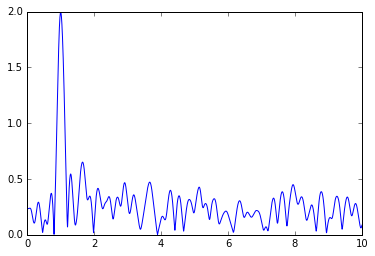